# **Data in Design, AI for Urban Data and Visualization**

#### Data, Design Computation, Artificial Intelligence, Visualization, Harvard GSD J Term 2023


**KEYWORD:**
Vector, Raster, Urban Data, GIS, Data Processing, Data Mining, Machine Learning, Artificial Intelligence, Visualization, Mapping, Design Decision-Making

-----

#### Instructor : NJ Namju Lee / nj.namju@gmail.com  
###### * Linkedin - https://www.linkedin.com/in/nj-namju-lee-926b3252/    * Git - https://github.com/NamjuLee  

###### * Web - http://www.njstudio.co.kr                                  * Lab - http://www.njslab.com/NJSLabCore/  

###### * Video(English) - https://www.youtube.com/c/njnamjulee            * Writing(English) - https://medium.com/@nj-namju  

###### * Video(Korean) - https://www.youtube.com/c/CodeforDesign          * Writing(Korean) - https://brunch.co.kr/@njnamju  
-----

## 1 import libs and data generation for training

In [152]:
import cv2
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

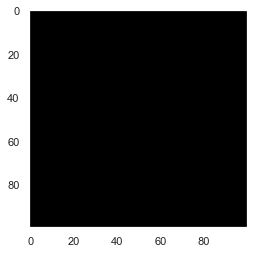

In [153]:
img = np.zeros((100, 100, 3), np.uint8)
plt.imshow(img)

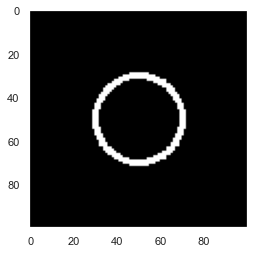

In [154]:
# https://www.geeksforgeeks.org/python-opencv-cv2-circle-method/
imgCircle = cv2.circle(img, (50, 50), 20, (255, 255, 255), 2)
plt.imshow(imgCircle)


In [155]:
filename = 'data/imgTest/savedImage.jpg'
cv2.imwrite(filename, imgCircle)
  

True

## 2 Circle, Rectangle, data generation for training

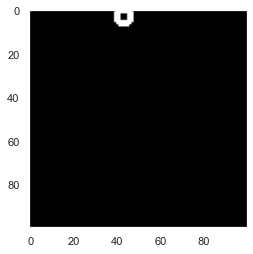

In [156]:
import random as rnd

path = 'data/img/'

observation = 1000

width = 100
height = 100


for i in range(observation):
    canvas = np.zeros((width, height, 3), np.uint8)
    x = rnd.randrange(0, width)
    y = rnd.randrange(0, height)

    r = rnd.randrange(5, ((width * 0.5) + (height * 0.5)) * 0.5 )

    if (x - r < 0):
        r = x
    if (y - r < 0):
        r = y

    if (x + r > width):
        r = width - x
    if (y + r > height):
        r = height - y


    imgCircle = cv2.circle(canvas, (x, y), r, (255, 255, 255), 2)
    plt.imshow(imgCircle)
    filename = path + 'circle_' + str(i) + '.jpg'
    cv2.imwrite(filename, imgCircle)

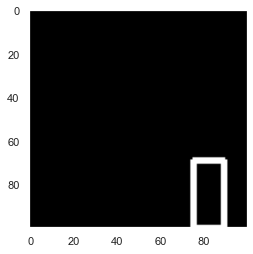

In [157]:
for i in range(observation):
    canvas = np.zeros((width, height, 3), np.uint8)
    x = rnd.randrange(0, width)
    y = rnd.randrange(0, height)

    rectWidth = rnd.randrange(0, width)
    rectHeight = rnd.randrange(0, height)

    if (x + rectWidth > width):
        rectWidth = width - x
    if (y + rectHeight > height):
        rectHeight = height - y

    imgRect = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
    plt.imshow(imgRect)
    filename = path + 'rect_' + str(i) + '.jpg'
    cv2.imwrite(filename, imgRect)



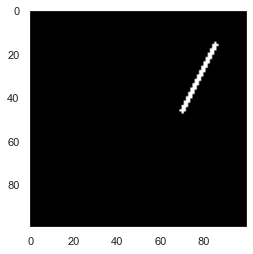

In [158]:
for i in range(observation):
    canvas = np.zeros((width, height, 3), np.uint8)
    x0 = rnd.randrange(0, width)
    y0 = rnd.randrange(0, height)

    x1 = rnd.randrange(0, width)
    y1 = rnd.randrange(0, height)

    # imgRect = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
    imgLine = cv2.line(canvas, (x0, y0), (x1, y1), (255, 255 ,255), 2 )
    plt.imshow(imgLine)
    filename = path + 'line_' + str(i) + '.jpg'
    cv2.imwrite(filename, imgLine)



## 3 Loading data & training models and validation

In [159]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Input

In [160]:
CLASS_INDEX = ['Circle', 'Rectangle', 'Line']
EPOCHS = 30

In [161]:
from os import walk
import numpy as np

f = []
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)

np.random.seed(222)
np.random.shuffle(f)

print (f)  

['rect_983.jpg', 'line_256.jpg', 'rect_570.jpg', 'circle_779.jpg', 'rect_850.jpg', 'circle_811.jpg', 'line_435.jpg', 'line_148.jpg', 'rect_321.jpg', 'line_200.jpg', 'circle_215.jpg', 'rect_28.jpg', 'circle_174.jpg', 'circle_395.jpg', 'circle_71.jpg', 'rect_611.jpg', 'circle_516.jpg', 'rect_404.jpg', 'rect_713.jpg', 'circle_272.jpg', 'circle_608.jpg', 'circle_257.jpg', 'line_271.jpg', 'rect_719.jpg', 'line_251.jpg', 'rect_699.jpg', 'rect_292.jpg', 'circle_604.jpg', 'circle_322.jpg', 'rect_695.jpg', 'line_602.jpg', 'line_367.jpg', 'line_279.jpg', 'line_583.jpg', 'line_721.jpg', 'circle_620.jpg', 'rect_452.jpg', 'line_49.jpg', 'line_442.jpg', 'circle_90.jpg', 'rect_486.jpg', 'rect_817.jpg', 'circle_677.jpg', 'circle_758.jpg', 'line_978.jpg', 'circle_442.jpg', 'rect_767.jpg', 'circle_37.jpg', 'rect_206.jpg', 'line_414.jpg', 'rect_170.jpg', 'rect_217.jpg', 'circle_308.jpg', 'rect_412.jpg', 'rect_733.jpg', 'rect_60.jpg', 'rect_248.jpg', 'line_360.jpg', 'rect_79.jpg', 'rect_949.jpg', 'rect_82

In [162]:

data = []
classList = []

for i in f:
    # print(i)
    if ('cir' in i):
        classList.append(0);
    elif ('lin' in i):
        classList.append(1);
    elif ('rec' in i):
        classList.append(2);
    elif ('savedImage in i'):
        continue

    thePath = path + i
    # print(path)
    img = cv2.imread(thePath)
    print(img.shape)
    # print(type(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    array = tf.keras.preprocessing.image.img_to_array(img).flatten()
    data.append(array)

data = np.array(data)
classList = np.array(classList)


(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 

In [163]:
print(data.shape)
print(data)
print(classList)

(3000, 10000)
[[  0.   0.   0. ... 253. 255. 255.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
[2 1 2 ... 2 0 1]


In [164]:
X_train, X_test, Y_train, Y_test = train_test_split(data, classList, test_size=0.3, random_state=0)

In [165]:
print(X_train.shape)
print(X_test.shape)

(2100, 10000)
(900, 10000)


In [166]:
X_Val = X_test[-100:]
Y_Val = Y_test[-100:]

X_test = X_test[:-100]
Y_test = Y_test[:-100]

In [167]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_Val = to_categorical(Y_Val)
print(Y_test.shape)

(800, 3)


In [168]:
model = Sequential([
  Input(shape=(100 * 100 * 1)),
  Dense(248, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(len(Y_test[1]), activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 248)               2480248   
_________________________________________________________________
dense_41 (Dense)             (None, 128)               31872     
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_43 (Dense)             (None, 3)                 195       
Total params: 2,520,571
Trainable params: 2,520,571
Non-trainable params: 0
_________________________________________________________________


In [169]:
hist = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
66/66 [==============================] - 2s 9ms/step - loss: 17.0303 - accuracy: 0.5122 - val_loss: 5.7304 - val_accuracy: 0.6275
Epoch 2/30
66/66 [==============================] - 0s 4ms/step - loss: 2.7216 - accuracy: 0.8031 - val_loss: 6.1584 - val_accuracy: 0.6388
Epoch 3/30
66/66 [==============================] - 0s 4ms/step - loss: 1.2542 - accuracy: 0.8844 - val_loss: 5.8209 - val_accuracy: 0.6338
Epoch 4/30
66/66 [==============================] - 0s 6ms/step - loss: 0.7474 - accuracy: 0.9272 - val_loss: 6.2022 - val_accuracy: 0.6400
Epoch 5/30
66/66 [==============================] - 0s 4ms/step - loss: 0.4735 - accuracy: 0.9545 - val_loss: 6.6539 - val_accuracy: 0.6475
Epoch 6/30
66/66 [==============================] - 0s 4ms/step - loss: 0.3217 - accuracy: 0.9640 - val_loss: 6.4268 - val_accuracy: 0.6513
Epoch 7/30
66/66 [==============================] - 0s 4ms/step - loss: 0.2223 - accuracy: 0.9716 - val_loss: 6.9889 - val_accuracy: 0.6787
Epoch 8/30
66/66 [=

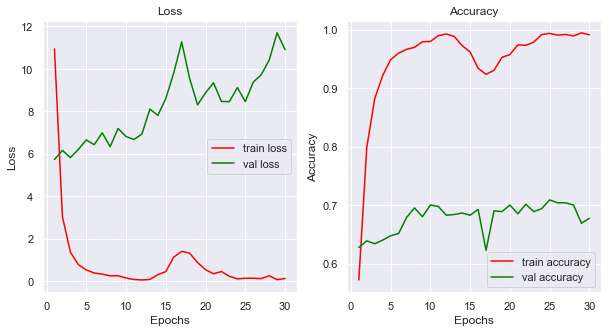

In [170]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

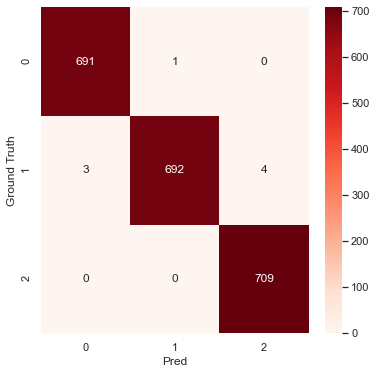

In [171]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='dark')
predY = model.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [172]:
data = []
classList = []

for i in f:
    if ('cir' in i):
        classList.append(0);
    elif ('lin' in i):
        classList.append(1);
    elif ('rec' in i):
        classList.append(2);
    elif ('savedImage in i'):
        continue

    thePath = path + i
    img = cv2.imread(thePath)
    array = tf.keras.preprocessing.image.img_to_array(img)
    data.append(array)

data = np.array(data)
classList = np.array(classList)
print(data.shape)

(3000, 100, 100, 3)


In [173]:
X_train, X_test, Y_train, Y_test = train_test_split(data, classList, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)

X_Val = X_test[-100:]
Y_Val = Y_test[-100:]

X_test = X_test[:-100]
Y_test = Y_test[:-100]

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_Val = to_categorical(Y_Val)
print(Y_test.shape)

(2100, 100, 100, 3)
(900, 100, 100, 3)
(800, 3)


In [174]:

model = Sequential([
  Flatten(input_shape=(100, 100, 3)),
  Dense(248, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(len(Y_test[1]), activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 248)               7440248   
_________________________________________________________________
dense_45 (Dense)             (None, 128)               31872     
_________________________________________________________________
dense_46 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_47 (Dense)             (None, 3)                 195       
Total params: 7,480,571
Trainable params: 7,480,571
Non-trainable params: 0
_________________________________________________________________


In [175]:
hist = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
66/66 [==============================] - 2s 12ms/step - loss: 26.8311 - accuracy: 0.5216 - val_loss: 14.7883 - val_accuracy: 0.5600
Epoch 2/30
66/66 [==============================] - 0s 6ms/step - loss: 7.2994 - accuracy: 0.7150 - val_loss: 9.6411 - val_accuracy: 0.6162
Epoch 3/30
66/66 [==============================] - 0s 6ms/step - loss: 3.4489 - accuracy: 0.8324 - val_loss: 7.9952 - val_accuracy: 0.6425
Epoch 4/30
66/66 [==============================] - 0s 6ms/step - loss: 1.5100 - accuracy: 0.8922 - val_loss: 8.9726 - val_accuracy: 0.6388
Epoch 5/30
66/66 [==============================] - 0s 6ms/step - loss: 1.0020 - accuracy: 0.9291 - val_loss: 7.6669 - val_accuracy: 0.6525
Epoch 6/30
66/66 [==============================] - 0s 6ms/step - loss: 0.4566 - accuracy: 0.9486 - val_loss: 7.5571 - val_accuracy: 0.6525
Epoch 7/30
66/66 [==============================] - 0s 6ms/step - loss: 0.2030 - accuracy: 0.9726 - val_loss: 6.9376 - val_accuracy: 0.6787
Epoch 8/30
66/66 

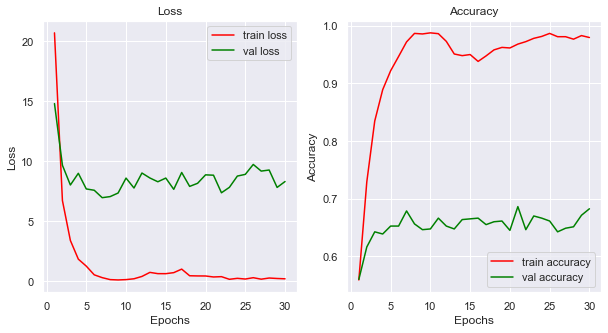

In [176]:
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

In [177]:
model.evaluate(X_test, Y_test)
model.evaluate(X_Val, Y_Val)

4/4 [==============================] - 0s 4ms/step - loss: 8.9755 - accuracy: 0.6100


[8.975516319274902, 0.6100000143051147]

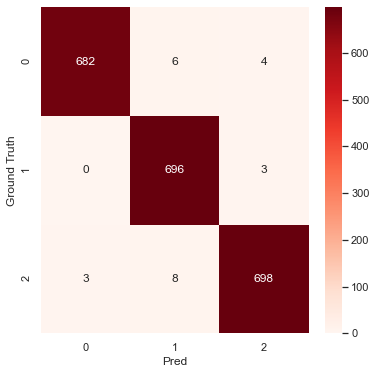

In [178]:
predY = model.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [179]:
from keras.layers import Dropout

In [180]:

model = Sequential([
  Flatten(input_shape=(100, 100, 3)),
  Dense(248, activation='relu'),
  Dropout(0.5),
  Dense(128, activation='relu'),
  Dropout(0.25),
  Dense(64, activation='relu'),
  Dense(len(Y_test[1]), activation='softmax')
])

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=32, validation_data=(X_test, Y_test))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_48 (Dense)             (None, 248)               7440248   
_________________________________________________________________
dropout_4 (Dropout)          (None, 248)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               31872     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_51 (Dense)             (None, 3)               

4/4 [==============================] - 0s 3ms/step - loss: 1.7164 - accuracy: 0.6700


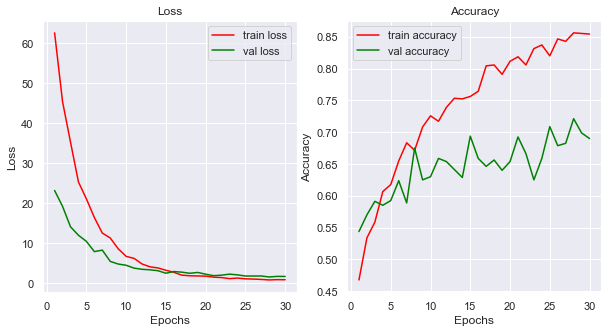

In [181]:
model.evaluate(X_test, Y_test)
model.evaluate(X_Val, Y_Val)
historyData = hist.history

fig = plt.figure(figsize=(10, 5))
ax0 = fig.add_subplot(1,2, 1)
ax0.set_title('Loss')
ax0.grid()
ax0.set_xlabel('Epochs')
ax0.set_ylabel('Loss')
ax0.plot(range(1,len(historyData['loss'])+1), historyData['loss'], c='red', label ='train loss' )
ax0.plot(range(1,len(historyData['val_loss'])+1), historyData['val_loss'], c='green', label ='val loss' )
ax0.legend()

ax1 = fig.add_subplot(1,2, 2)
ax1.set_title('Accuracy')
ax1.grid()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.plot(range(1,len(historyData['accuracy'])+1), historyData['accuracy'], c='red', label ='train accuracy' )
ax1.plot(range(1,len(historyData['val_accuracy'])+1), historyData['val_accuracy'], c='green', label ='val accuracy' )
ax1.legend()

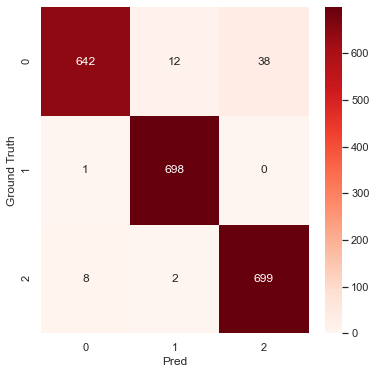

In [182]:
predY = model.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dropout, Flatten, Dense, Input

In [184]:
modelSecond = Sequential(
    [
        Input(shape=(100,100,3)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.3),
        Flatten(),
        Dense(len(Y_test[1]), activation="softmax"),
    ]
)

modelSecond.summary()
modelSecond.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
              

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 33856)            

In [185]:
histSecond = modelSecond.fit(
    X_train, Y_train, 
    epochs = EPOCHS, batch_size=64,
    # verbose=0,
    validation_data=(X_test, Y_test)
    )


Epoch 1/30
33/33 [==============================] - 2s 55ms/step - loss: 12.2750 - accuracy: 0.4467 - val_loss: 0.9003 - val_accuracy: 0.5600
Epoch 2/30
33/33 [==============================] - 2s 53ms/step - loss: 0.7921 - accuracy: 0.6833 - val_loss: 0.7481 - val_accuracy: 0.6550
Epoch 3/30
33/33 [==============================] - 2s 52ms/step - loss: 0.5471 - accuracy: 0.7667 - val_loss: 0.6399 - val_accuracy: 0.7063
Epoch 4/30
33/33 [==============================] - 2s 53ms/step - loss: 0.4965 - accuracy: 0.7929 - val_loss: 0.6084 - val_accuracy: 0.7063
Epoch 5/30
33/33 [==============================] - 2s 52ms/step - loss: 0.4013 - accuracy: 0.8414 - val_loss: 0.5924 - val_accuracy: 0.7450
Epoch 6/30
33/33 [==============================] - 2s 53ms/step - loss: 0.3663 - accuracy: 0.8533 - val_loss: 0.6107 - val_accuracy: 0.7462
Epoch 7/30
33/33 [==============================] - 2s 52ms/step - loss: 0.3003 - accuracy: 0.8776 - val_loss: 0.6395 - val_accuracy: 0.7462
Epoch 8/30
3

4/4 [==============================] - 0s 11ms/step - loss: 1.5556 - accuracy: 0.7900


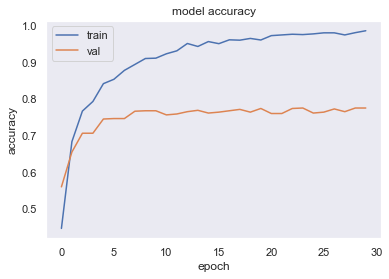

In [186]:
modelSecond.evaluate(X_train, Y_train)
modelSecond.evaluate(X_test, Y_test)
modelSecond.evaluate(X_Val, Y_Val)
plt.plot(histSecond.history['accuracy'])
plt.plot(histSecond.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

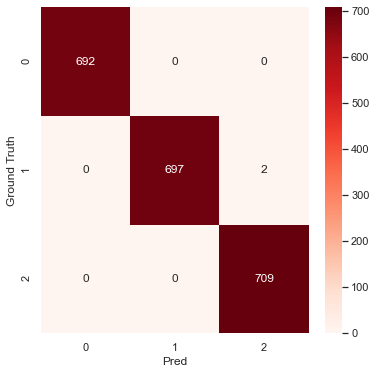

In [187]:
predY = modelSecond.predict(X_train)
yTestYOnehot = Y_train

plt.figure(figsize=(6,6))
conMat = confusion_matrix(np.argmax(yTestYOnehot, axis=1), np.argmax(predY, axis=1))
sns.heatmap(conMat, annot=True, cmap='Reds', fmt='d')
plt.xlabel('Pred')
plt.ylabel('Ground Truth')
plt.show()

## 5 Testing models

In [188]:
from os import walk
import numpy as np

path = 'data/imgTest/'
f = []
for (dirpath, dirnames, filenames) in walk(path):
    f.extend(filenames)

print (f)  

['circle_01.jpg', 'circle_02.jpg', 'circle_03.jpg', 'savedImage.jpg']


In [189]:
data = []
classList = []

for i in f:
    thePath = path + i
    img = cv2.imread(thePath)
    # print(array.shape)
    data.append(array)

data = np.array(data)
print(data.shape)

(100, 100, 3)
(100, 100, 3)
(100, 100, 3)
(100, 100, 3)


In [190]:
results = modelSecond.predict(data)
print(results)

resultsss = model.predict(data)
print(results)

[[3.3504182e-07 9.9999952e-01 1.7818084e-07]
 [3.3504182e-07 9.9999952e-01 1.7818084e-07]
 [3.3504182e-07 9.9999952e-01 1.7818084e-07]
 [3.3504182e-07 9.9999952e-01 1.7818084e-07]]
[[3.3504182e-07 9.9999952e-01 1.7818084e-07]
 [3.3504182e-07 9.9999952e-01 1.7818084e-07]
 [3.3504182e-07 9.9999952e-01 1.7818084e-07]
 [3.3504182e-07 9.9999952e-01 1.7818084e-07]]


In [191]:
for result in results:
    index = np.argmax(result)
    print(CLASS_INDEX[index], result[index])

for result in resultsss:
    index = np.argmax(result)
    print(CLASS_INDEX[index], result[index])

Rectangle 0.9999995
Rectangle 0.9999995
Rectangle 0.9999995
Rectangle 0.9999995
Rectangle 0.9995441
Rectangle 0.9995441
Rectangle 0.9995441
Rectangle 0.9995441


In [192]:
def getDrawing(type):
    offset = 5
    theWidth = width - offset
    theHeight = height - offset
    canvas = np.zeros(( width, height, 3), np.uint8)
    x = rnd.randrange(0, theHeight) + offset
    y = rnd.randrange(0, theHeight) + offset

    if type == 'cir':
        r = rnd.randrange(5, (int(theWidth * 0.5) + int(theHeight * 0.5)) * 0.5 )
        if (x - r < 0):
            r = x
        if (y - r < 0):
            r = y

        if (x + r > theWidth):
            r = theWidth - x
        if (y + r > theHeight):
            r = theHeight - y

        img = cv2.circle(canvas, (x, y), r, (255, 255, 255), 2)
        return img

    elif type == 'rect':
        rectWidth = rnd.randrange(0, theWidth)
        rectHeight = rnd.randrange(0, theHeight)
        if (x + rectWidth > theWidth):
            rectWidth = theWidth - x
        if (y + rectHeight > theHeight):
            rectHeight = theHeight - y
        img = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
        return img

    elif type == 'line':
        x1 = rnd.randrange(0, theWidth)
        y1 = rnd.randrange(0, theHeight)
        # imgRect = cv2.rectangle(canvas, (x, y), (x + rectWidth, y + rectHeight), (255, 255 ,255), 2)
        img = cv2.line(canvas, (x, y), (x1, y1), (255, 255 ,255), 2 )
        return img
def img2array(img):
    return tf.keras.preprocessing.image.img_to_array(img)

shape (100, 100, 3)
[[9.4400024e-01 5.5999745e-02 2.8123326e-10]]
Circle 94.4000244140625
[[94  5  0]]


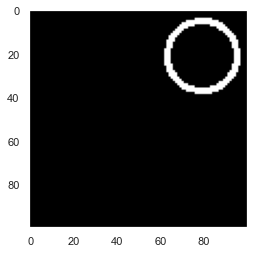

In [193]:
cir = getDrawing('cir')
plt.imshow(cir)

array = img2array(cir)
print('shape', array.shape)

result = modelSecond.predict(np.array([array]))
print(result)
index = np.argmax(result)

print(CLASS_INDEX[index], result[0][index] * 100)
print((result * 100).astype(int))

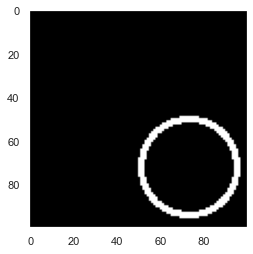

[[1.000000e+00 7.548829e-12 2.893131e-16]]
Circle 100.0
[[100   0   0]]


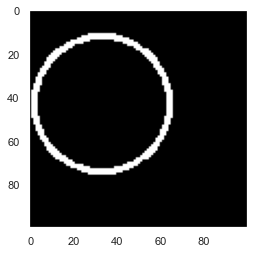

[[9.9539006e-01 4.6098982e-03 5.1661776e-18]]
Circle 99.53900575637817
[[99  0  0]]


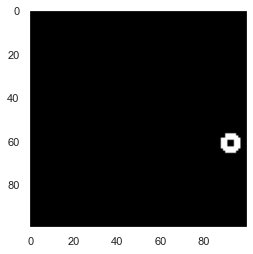

[[0.9889636  0.00602981 0.00500654]]
Circle 98.89636039733887
[[98  0  0]]


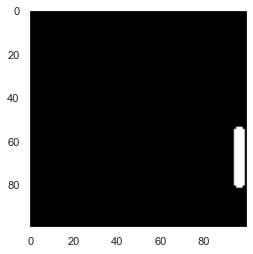

[[9.5330935e-04 2.6156811e-02 9.7288990e-01]]
Line 97.28899002075195
[[ 0  2 97]]


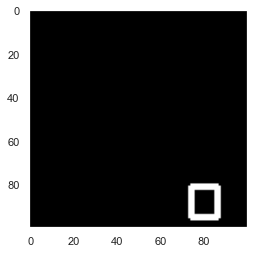

[[3.4302712e-08 3.0314815e-03 9.9696845e-01]]
Line 99.69684481620789
[[ 0  0 99]]


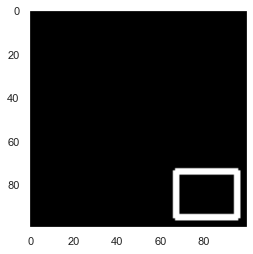

[[1.5003314e-09 2.1421094e-05 9.9997854e-01]]
Line 99.99785423278809
[[ 0  0 99]]


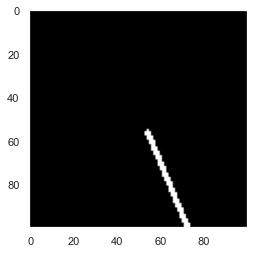

[[2.8033850e-07 9.9999976e-01 9.2825692e-10]]
Rectangle 99.99997615814209
[[ 0 99  0]]


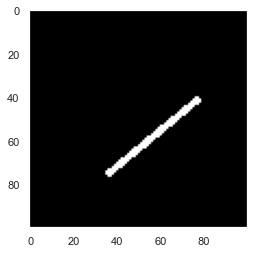

[[3.3850393e-03 9.9661499e-01 2.3074218e-11]]
Rectangle 99.66149926185608
[[ 0 99  0]]


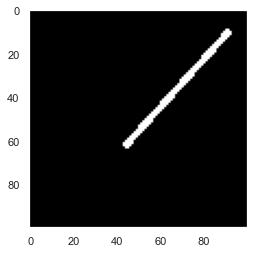

[[8.9889538e-05 9.9991012e-01 5.5084035e-13]]
Rectangle 99.99101161956787
[[ 0 99  0]]


In [194]:
def getPrediction(typeShape):
    cir = getDrawing(typeShape)
    plt.imshow(cir)
    plt.show()

    array = img2array(cir)
    # print('shape', array.shape)

    result = modelSecond.predict(np.array([array]))
    print(result)
    index = np.argmax(result)

    print(CLASS_INDEX[index], result[0][index] * 100)
    print((result * 100).astype(int))

typeShapes = ['cir', 'cir', 'cir', 'rect', 'rect', 'rect', 'line', 'line', 'line']
for t in typeShapes:
    getPrediction(t)
